# Weather Maps

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# API keys
from config import api_key

In [2]:
# these next to cells i got from the starter code to generate list of cities to use
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
towns = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in towns:
        towns.append(city)

# Print the city count to confirm sufficient count
len(towns)

610

In [7]:
# setting my search paramaters
# towns = ['st. paul', 'albany', 'st. louis', 'miami', 'portland']
units = 'imperial'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

In [8]:
# running thru my list of cities and grabbing the data i want
cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

rec_num = 0
set_num = 0

print('Beginning Data Calls.')
print('-----------------------')

for city in towns:
    
    city_url = f"{base_url}q={city}&units={units}&appid={api_key}"
    response = requests.get(city_url)
    city_json = response.json()
    
    # sleep for one second to avoid requesting more than 60 per min
    time.sleep(1)
    
    # i want city, lat, lng, max temp, humidity, cloudiness, windspeed, country, date
    try:
        cities.append(city_json['name'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        humidity.append(city_json['main']['humidity'])
        cloudiness.append(city_json['clouds']['all'])
        wind_speed.append(city_json['wind']['speed'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        
        if rec_num < 49:
            rec_num += 1
        else:
            rec_num = 0
            set_num +=1

        print(f'Processing Record {rec_num} of Set {set_num} | {city}')
        
    except:
        print('City not found Skipping.')
        

        
        
weather_dict = {
    'City': cities,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

weather_df = pd.DataFrame(weather_dict)

Beginning Data Calls.
-----------------------
Processing Record 1 of Set 0 | adrar
Processing Record 2 of Set 0 | najran
Processing Record 3 of Set 0 | tuktoyaktuk
Processing Record 4 of Set 0 | severo-kurilsk
Processing Record 5 of Set 0 | albany
Processing Record 6 of Set 0 | dinklage
Processing Record 7 of Set 0 | atar
City not found Skipping.
Processing Record 8 of Set 0 | samfya
Processing Record 9 of Set 0 | castro
Processing Record 10 of Set 0 | hermanus
Processing Record 11 of Set 0 | vao
Processing Record 12 of Set 0 | manokwari
Processing Record 13 of Set 0 | saint-philippe
Processing Record 14 of Set 0 | srednekolymsk
Processing Record 15 of Set 0 | hobart
Processing Record 16 of Set 0 | muros
Processing Record 17 of Set 0 | leshukonskoye
Processing Record 18 of Set 0 | thompson
Processing Record 19 of Set 0 | havelock
Processing Record 20 of Set 0 | rikitea
Processing Record 21 of Set 0 | acajutla
Processing Record 22 of Set 0 | punta arenas
Processing Record 23 of Set 0 | 

Processing Record 41 of Set 3 | paka
Processing Record 42 of Set 3 | bereda
Processing Record 43 of Set 3 | geraldton
Processing Record 44 of Set 3 | goderich
Processing Record 45 of Set 3 | hofn
Processing Record 46 of Set 3 | ponta delgada
Processing Record 47 of Set 3 | rockland
City not found Skipping.
Processing Record 48 of Set 3 | qui nhon
City not found Skipping.
Processing Record 49 of Set 3 | nuuk
Processing Record 0 of Set 4 | victoria
Processing Record 1 of Set 4 | ammon
Processing Record 2 of Set 4 | provideniya
Processing Record 3 of Set 4 | maragogi
Processing Record 4 of Set 4 | bilibino
Processing Record 5 of Set 4 | talnakh
Processing Record 6 of Set 4 | kruisfontein
Processing Record 7 of Set 4 | nikel
Processing Record 8 of Set 4 | sinnamary
Processing Record 9 of Set 4 | alabaster
Processing Record 10 of Set 4 | boyarka
Processing Record 11 of Set 4 | kyzyl-suu
Processing Record 12 of Set 4 | namatanai
Processing Record 13 of Set 4 | kodinsk
Processing Record 14 of

Processing Record 34 of Set 7 | belmonte
Processing Record 35 of Set 7 | owando
City not found Skipping.
Processing Record 36 of Set 7 | fayaoue
Processing Record 37 of Set 7 | akyab
Processing Record 38 of Set 7 | sobolevo
Processing Record 39 of Set 7 | del rio
Processing Record 40 of Set 7 | chipata
Processing Record 41 of Set 7 | kurchum
Processing Record 42 of Set 7 | oussouye
City not found Skipping.
Processing Record 43 of Set 7 | skjervoy
Processing Record 44 of Set 7 | ancud
Processing Record 45 of Set 7 | kyabe
Processing Record 46 of Set 7 | lincoln
Processing Record 47 of Set 7 | ordu
Processing Record 48 of Set 7 | salinopolis
Processing Record 49 of Set 7 | labuan
Processing Record 0 of Set 8 | antofagasta
Processing Record 1 of Set 8 | bandarbeyla
Processing Record 2 of Set 8 | masunga
Processing Record 3 of Set 8 | shibetsu
Processing Record 4 of Set 8 | puerto asis
Processing Record 5 of Set 8 | bengkulu
Processing Record 6 of Set 8 | puerto cabezas
Processing Record 7

In [9]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adrar,20.5022,-10.0711,79.16,15,0,11.99,MR,1612878869
1,Najrān,17.4924,44.1277,68.00,56,75,6.91,SA,1612878870
2,Tuktoyaktuk,69.4541,-133.0374,-32.44,85,85,6.96,CA,1612878794
3,Severo-Kuril'sk,50.6789,156.1250,25.52,91,100,23.91,RU,1612878778
4,Albany,42.6001,-73.9662,21.99,72,100,4.47,US,1612878607


In [10]:
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [11]:
weather_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [12]:
# getting rid of cities with humidity greater than 100
weather_df = weather_df.loc[weather_df['Humidity'] <= 100, :]

In [13]:
weather_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [14]:
output_file = 'output/weather_data.csv'

weather_df.to_csv(output_file, index=False)

### Incase I want to jump right into it and bypass some of the above

In [ ]:
# weather_df = pd.read_csv(output_file)

# ok, I have data.

## Scatterplots

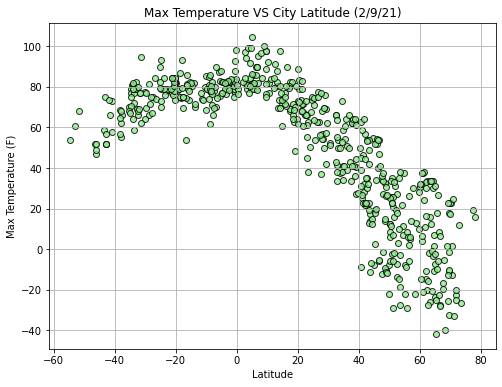

In [50]:
# temperature vs latitude

# creating lists for plotting
lat = weather_df['Lat']
temp = weather_df['Max Temp']

# making size and plotting
plt.figure(figsize=(8,6))
plt.scatter(lat, temp, color='lightgreen', edgecolor='black', alpha=.8)

# adding labels
plt.title('Max Temperature VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.grid(True)

plt.show()

The graph 'Max Temperature VS City Latitude' is looking into relationship between how tempurature is affected by the distance from the equator. The code is plotting the max temp column on the y axis and the lat column on the x axis. 

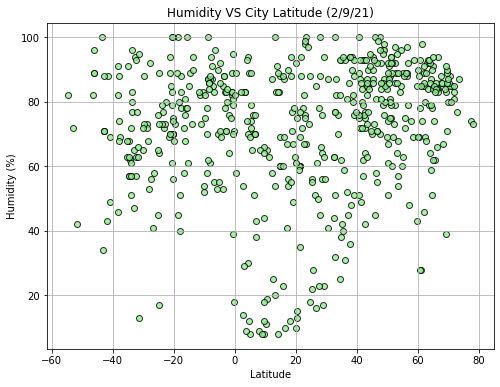

In [51]:
# humidity vs latitude
humid = weather_df['Humidity']

# sizing and plotting
plt.figure(figsize=(8,6))
plt.scatter(lat, humid, color='lightgreen', edgecolor='black', alpha=.8)

# adding labels
plt.title('Humidity VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid(True)

plt.show()

This graph is 'Humidity VS City Latitude' it is comparing the relationship between humidity and nearness to the equator.
The code is plotting the Humidity column on the y axis and the lat column on the x.

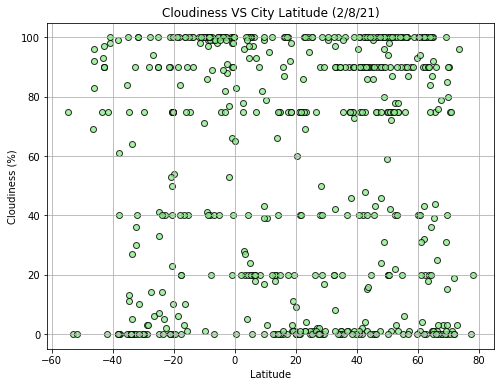

In [17]:
# cloudiness vs latitude
clouds = weather_df['Cloudiness']

# sizing and plotting
plt.figure(figsize=(8,6))
plt.scatter(lat, clouds, color='lightgreen', edgecolor='black', alpha=.8)

# adding labels
plt.title('Cloudiness VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid(True)

plt.show()

This Graph, 'Cloudiness VS City Latitude' is looking at the relationship of Cloud coverage compared to its latitude. 

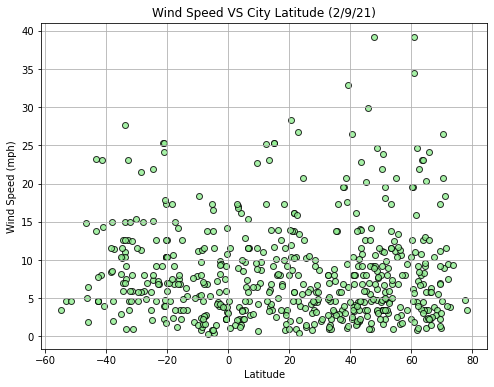

In [52]:
# wind speed VS lat
windy = weather_df['Wind Speed']

# sizing and plotting
plt.figure(figsize=(8,6))
plt.scatter(lat, windy, color='lightgreen', edgecolor='black', alpha=.8)

# adding labels
plt.title('Wind Speed VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid(True)

plt.show()

This graph 'Wind Speed VS City Latitude' is looking to if latitude correlates with Wind speed. the code plots wind speed column on y axis and lat column on x axis.

# Regressions

In [19]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adrar,20.5022,-10.0711,79.16,15,0,11.99,MR,1612878869
1,Najrān,17.4924,44.1277,68.00,56,75,6.91,SA,1612878870
2,Tuktoyaktuk,69.4541,-133.0374,-32.44,85,85,6.96,CA,1612878794
3,Severo-Kuril'sk,50.6789,156.1250,25.52,91,100,23.91,RU,1612878778
4,Albany,42.6001,-73.9662,21.99,72,100,4.47,US,1612878607


In [24]:
# need to split data into two df's one of northern hemisphere and one of southern hemisphere
north_df = weather_df.loc[weather_df['Lat'] > 0, :]
south_df = weather_df.loc[weather_df['Lat'] < 0, :]
north_df.count()

City          386
Lat           386
Lng           386
Max Temp      386
Humidity      386
Cloudiness    386
Wind Speed    386
Country       386
Date          386
dtype: int64

The r value is -0.8720494384027345
The r squared value is 0.7604702230185246


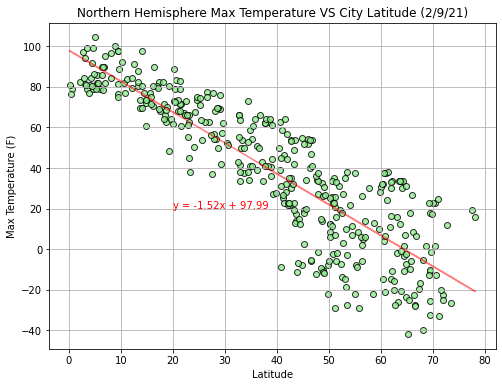

In [32]:
# north temp vs lat

# making a list of values for graphing
n_temp = north_df['Max Temp']
n_lat = north_df['Lat']

# getting my values from my linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)

# creating my linear regression line
regress_line = slope * n_lat + intercept

# printing my r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

# making plot
plt.figure(figsize=(8,6))
plt.scatter(n_lat, n_temp, color='lightgreen', edgecolor='black', alpha=.8)
plt.plot(n_lat, regress_line, color='r', alpha=.5)

plt.title('Northern Hemisphere Max Temperature VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

line_str = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_str, (20,20), color='r')

plt.grid(True)

plt.show()

In the above Plot, 'Northern Hemisphere Max Temperature VS City Latitude' I am looking at the relationship between temperature and latitude. I am only looking at the northern hemisphere so that i can do an linear regression on it, as the southern hemisphere looks different. The correleation coeffecient here is very strong, -0.87 meaning the two are probably correlated. The regression is also pretty good with a r squared value of 0.76. I would say that there is a correlation between Temperature and Latitude.

The r value is 0.5956146371382132
The r squared value is 0.35475679597328535


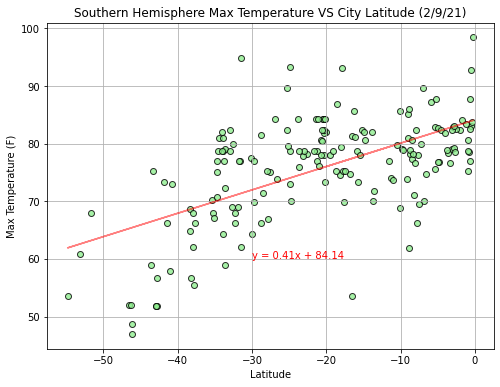

In [42]:
# south temp vs lat

# making a list of values for graphing
s_temp = south_df['Max Temp']
s_lat = south_df['Lat']

# getting my values from my linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)

# creating my linear regression line
regress_line = slope * s_lat + intercept

# printing my r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

# making plot
plt.figure(figsize=(8,6))
plt.scatter(s_lat, s_temp, color='lightgreen', edgecolor='black', alpha=.8)
plt.plot(s_lat, regress_line, color='r', alpha=.5)

plt.title('Southern Hemisphere Max Temperature VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

line_str = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_str, (-30,60), color='r')

plt.grid(True)

plt.show()

This graph 'Southern Hemisphere Max Temperature VS City Latitude' is looking at the same relationship as the above plot and regression, but this regression is not as strong. For starters, there are less data points to work with here, which never helps, and from just looking at it, they appear far more spread out then the northern hemisphere does. I don't believe that latitude doesn't magically have the same relationship down south as it does up north, but there are a lot of other factors in weather and climate realations that latitude going on there. Maybe the Southern hemisphere is just more intersting of a hemisphere than the north.

The r value is 0.38584159609091156
The r squared value is 0.14887373727398215


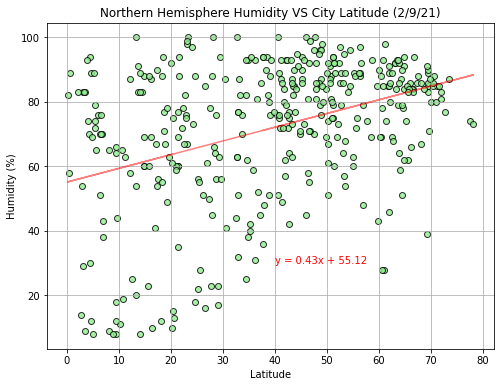

In [37]:
# north humid vs lat

# making a list of values for graphing
n_humid = north_df['Humidity']

# getting my values from my linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_humid)

# creating my linear regression line
regress_line = slope * n_lat + intercept

# printing my r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

# making plot
plt.figure(figsize=(8,6))
plt.scatter(n_lat, n_humid, color='lightgreen', edgecolor='black', alpha=.8)
plt.plot(n_lat, regress_line, color='r', alpha=.5)

plt.title('Northern Hemisphere Humidity VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

line_str = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_str, (40,30), color='r')

plt.grid(True)

plt.show()

The r value is 0.14565735262164953
The r squared value is 0.02121606437274755


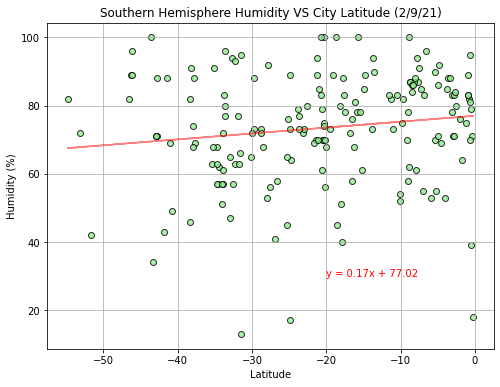

In [40]:
# south humid vs lat

# making a list of values for graphing
s_humid = south_df['Humidity']

# getting my values from my linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_humid)

# creating my linear regression line
regress_line = slope * s_lat + intercept

# printing my r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

# making plot
plt.figure(figsize=(8,6))
plt.scatter(s_lat, s_humid, color='lightgreen', edgecolor='black', alpha=.8)
plt.plot(s_lat, regress_line, color='r', alpha=.5)

plt.title('Southern Hemisphere Humidity VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

line_str = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_str, (-20,30), color='r')

plt.grid(True)

plt.show()

The r value is 0.05277729600843523
The r squared value is 0.0027854429739619935


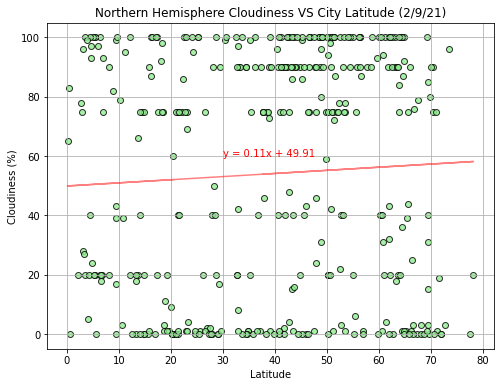

In [44]:
# north clouds vs lat

# making a list of values for graphing
n_clouds = north_df['Cloudiness']

# getting my values from my linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_clouds)

# creating my linear regression line
regress_line = slope * n_lat + intercept

# printing my r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

# making plot
plt.figure(figsize=(8,6))
plt.scatter(n_lat, n_clouds, color='lightgreen', edgecolor='black', alpha=.8)
plt.plot(n_lat, regress_line, color='r', alpha=.5)

plt.title('Northern Hemisphere Cloudiness VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

line_str = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_str, (30,60), color='r')

plt.grid(True)

plt.show()

The r value is 0.3771652488985968
The r squared value is 0.1422536249767405


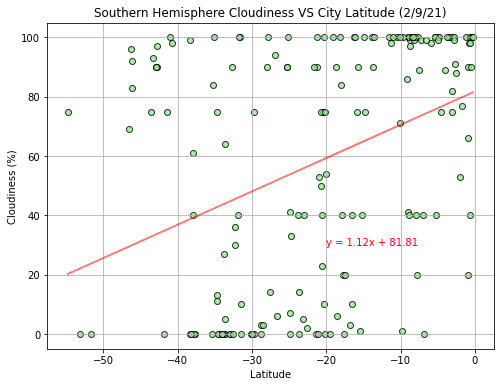

In [45]:
# south clouds vs lat

# making a list of values for graphing
s_clouds = south_df['Cloudiness']

# getting my values from my linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_clouds)

# creating my linear regression line
regress_line = slope * s_lat + intercept

# printing my r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

# making plot
plt.figure(figsize=(8,6))
plt.scatter(s_lat, s_clouds, color='lightgreen', edgecolor='black', alpha=.8)
plt.plot(s_lat, regress_line, color='r', alpha=.5)

plt.title('Southern Hemisphere Cloudiness VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

line_str = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_str, (-20,30), color='r')

plt.grid(True)

plt.show()

The r value is 0.03148779673731047
The r squared value is 0.0009914813433701797


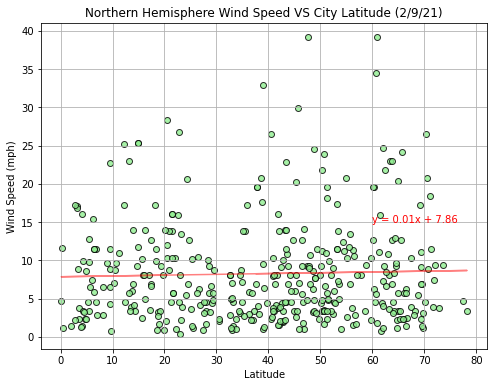

In [47]:
# north windy vs lat

# making a list of values for graphing
n_windy = north_df['Wind Speed']

# getting my values from my linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_windy)

# creating my linear regression line
regress_line = slope * n_lat + intercept

# printing my r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

# making plot
plt.figure(figsize=(8,6))
plt.scatter(n_lat, n_windy, color='lightgreen', edgecolor='black', alpha=.8)
plt.plot(n_lat, regress_line, color='r', alpha=.5)

plt.title('Northern Hemisphere Wind Speed VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

line_str = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_str, (60,15), color='r')

plt.grid(True)

plt.show()

The r value is -0.2150604136467678
The r squared value is 0.04625098151791888


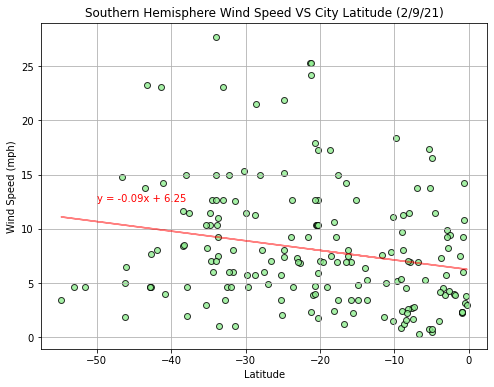

In [49]:
# south windy vs lat

# making a list of values for graphing
s_windy = south_df['Wind Speed']

# getting my values from my linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_windy)

# creating my linear regression line
regress_line = slope * s_lat + intercept

# printing my r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

# making plot
plt.figure(figsize=(8,6))
plt.scatter(s_lat, s_windy, color='lightgreen', edgecolor='black', alpha=.8)
plt.plot(s_lat, regress_line, color='r', alpha=.5)

plt.title('Southern Hemisphere Wind Speed VS City Latitude (2/9/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

line_str = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_str, (-50,12.5), color='r')

plt.grid(True)

plt.show()